In [2]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
from tsne_data import tsne_data, defect_dict
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "mps:0"

['9', '0', '11', '7', '6', '1', '10', '8', '4', '3', '12', '2', '5']


In [3]:
print(len(tsne_data))

28


In [4]:
testloader = torch.utils.data.DataLoader(tsne_data, batch_size=1)

In [5]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

In [6]:
# model = torchvision.models.resnet50(pretrained=False)
import timm
model = timm.create_model("resnet50", pretrained=True, num_classes = 13)
num_ftrs = model.fc.in_features # fc의 입력 노드 수를 산출한다. 512개
model.fc = nn.Linear(num_ftrs, 13) # fc를 nn.Linear(num_ftrs, 10)로 대체, CIFAR10,,
model = model.to(device)

/Users/gwonsmpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


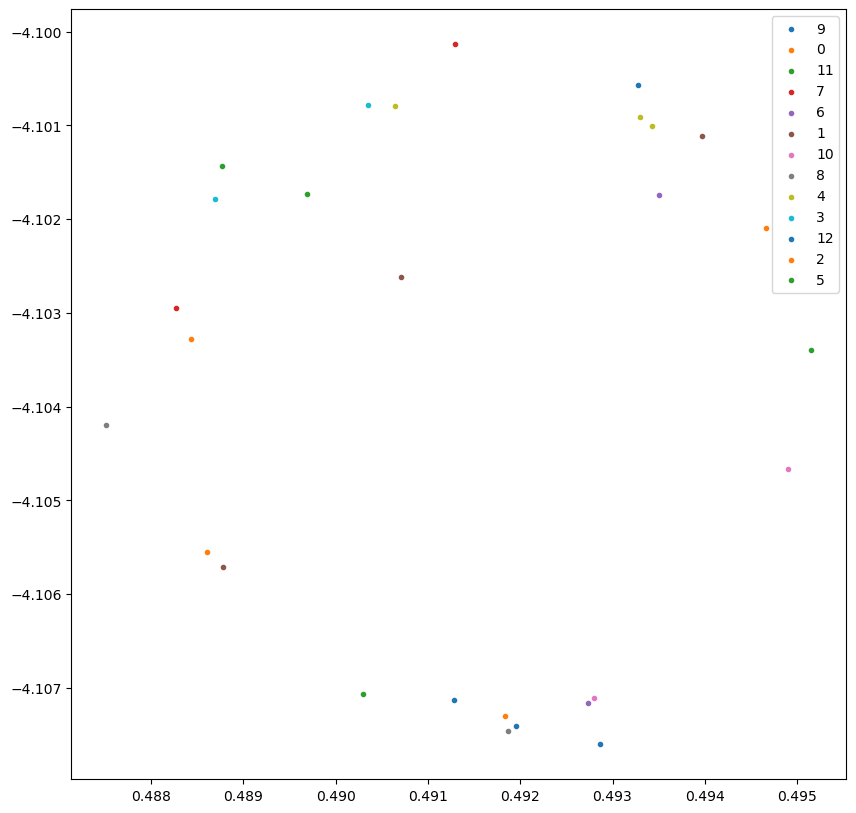

In [7]:
actual = []
deep_features = []

model.eval() # resnet18
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        features = model(images) # 512 차원

        deep_features += features.cpu().numpy().tolist()
        actual += labels.cpu().numpy().tolist()

tsne = TSNE(n_components=2, init='pca', learning_rate='auto') # 사실 easy 함 sklearn 사용하니..
cluster = np.array(tsne.fit_transform(np.array(deep_features)))
actual = np.array(actual)

plt.figure(figsize=(10, 10))
# cifar = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(13), defect_dict.keys()):
    idx = np.where(actual == i)
    plt.scatter(cluster[idx, 0], cluster[idx, 1], marker='.', label=label)

plt.legend()
plt.show()